## Slow down margin
This notebook will explain the reasoning behind `slow_down_margin` parameter.

In [1]:
%matplotlib inline
from scipy import optimize
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
from functools import partial

Suppose the collision detection system has certain `delay`. The detection of a required brake is delayed by a `delay` seconds. We can plot the speed of the robot with this delay.

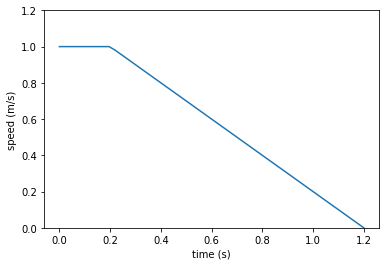

In [2]:
d = 0.2  # delay
v_max = 1  # m/s
a = 1  # decelleration speed m/s

t = np.linspace(0, 1.2)
v = np.piecewise(t, [t < d, t >= d], [lambda t: v_max, lambda t: v_max - a * (t - d)])
plt.plot(t, v)
plt.ylim(0, 1.2)
plt.xlabel('time (s)')
plt.ylabel('speed (m/s)');

The traveled distance can be calculated as follows

$s = d \cdot v_{max} + \frac{v_{max}^2}{2 \cdot a}$

Suppose the robot detects an obstacle at $s$ meters. We can calculate back what the maximum allowed speed of the robot is while taking into account the delay.

Let's solve for $v$. We need to use the ABC forumula.

$\frac{1}{2 \cdot a} v^2 + dv - s = 0$

$D = d^2 + \frac{2s}{a}$

$v = \frac{-d \pm \sqrt{D}}{2/2a} = -ad \pm a\sqrt{d^2 + \frac{2s}{a}} $

$v = -ad \pm \sqrt{a(ad^2 - 2s)}$

## Simulation
Let's check what the dynamic behavior is of the robot, when using this control law.

In [3]:
def f(t, x, d):
    dxdt = -a * d + np.sqrt(a * (a * d * d + 2 * -x))
    return dxdt

In [4]:
t_span = [0, 4]
sol1 = solve_ivp(partial(f, d=0.1), t_span, [-1], dense_output=True)
sol2 = solve_ivp(partial(f, d=0.2), t_span, [-1], dense_output=True)
sol3 = solve_ivp(partial(f, d=0.5), t_span, [-1], dense_output=True)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


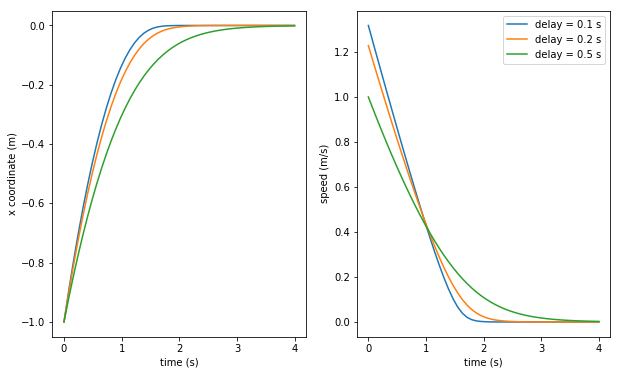

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,6))

ts = np.linspace(*t_span)
ax1.plot(ts, sol1.sol(ts)[0], label='delay = 0.1 s')
ax1.plot(ts, sol2.sol(ts)[0], label='delay = 0.2 s')
ax1.plot(ts, sol3.sol(ts)[0], label='delay = 0.5 s')

ax1.set_xlabel('time (s)')
ax1.set_ylabel('x coordinate (m)')

ax2.plot(ts, f(ts, sol1.sol(ts)[0], d=0.1), label='delay = 0.1 s')
ax2.plot(ts, f(ts, sol2.sol(ts)[0], d=0.2), label='delay = 0.2 s')
ax2.plot(ts, f(ts, sol3.sol(ts)[0], d=0.5), label='delay = 0.5 s')
ax2.set_xlabel('time (s)')
ax2.set_ylabel('speed (m/s)');

ax2.legend();